In [28]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

True

In [29]:
model = ChatOpenAI()

In [30]:
#state
class ModelState(TypedDict):
    topic: str
    outline:str
    blog_post: str

In [31]:
def generate_outline(state: ModelState) -> ModelState:
    input = state['topic']
    
    prompt = f'Generate a brief outline for a blog post on the topic: {input}'
    
    outline = model.invoke(prompt).content

    state['outline'] = outline # type: ignore

    return state

In [32]:
def generate_blog(state: ModelState) -> ModelState:
    input = state['outline']
    topic = state['topic']
    
    prompt = f'Generate a blog post on the topic: {topic} of 100 words and 2 paragraphs from the following outline\n: {input}'
    
    blog_post = model.invoke(prompt).content
    
    state['blog_post'] = blog_post # type: ignore
    
    return state

In [33]:
# create graph
graph = StateGraph(ModelState)

# add nodes
graph.add_node('topic_outline', generate_outline) #type: ignore
graph.add_node('outline_blog', generate_blog) # type: ignore

# add edges
graph.add_edge(START, 'topic_outline')
graph.add_edge('topic_outline', 'outline_blog')
graph.add_edge('outline_blog', END)

# compile graph
workflow = graph.compile()

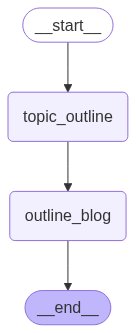

In [34]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [35]:
# initial state
initial_state = {'topic': 'Can an AI ever understand subjective human truth, and should every nation build its own AI to control that narrative?'}

#final state
final_state = workflow.invoke(initial_state)  # type: ignore

In [36]:
print(final_state['outline'])

I. Introduction 
- Introduce the concept of AI and its capabilities in understanding objective truth 
- Pose the question of whether AI can ever understand subjective human truth 

II. The limitations of AI in understanding subjective human truth 
- Discuss the challenges of programming AI to comprehend emotions, beliefs, and personal experiences 
- Highlight the importance of empathy and intuition in comprehending subjective truth 

III. The ethical implications of nations building their own AI for controlling narrative 
- Examine the potential consequences of allowing AI to shape and control subjective human truth 
- Discuss the dangers of using AI to manipulate public opinion and suppress dissent 

IV. The role of AI in enhancing human understanding of subjective truth 
- Explore ways in which AI can be utilized to facilitate dialogue and promote empathy 
- Discuss the potential benefits of AI in fostering a more inclusive and diverse narrative 

V. Conclusion 
- Revisit the questio

In [37]:
print(final_state['blog_post'])

Artificial Intelligence (AI) has made significant strides in understanding objective truth with the ability to process vast amounts of data and derive logical conclusions. However, the question remains whether AI can truly comprehend subjective human truth. Emotions, beliefs, and personal experiences are difficult to quantify and program into AI, making it challenging for machines to grasp the complexities of human subjectivity. Empathy and intuition play crucial roles in understanding subjective truth, qualities that are inherently human and difficult to replicate in AI.

The idea of nations building their own AI to control narrative raises ethical concerns about the manipulation of public opinion and suppression of dissent. Allowing AI to shape and control subjective truth could lead to a homogenized narrative that stifles diversity of thought and expression. There is a danger in relying too heavily on AI to dictate the narrative, as it may perpetuate biases and reinforce existing po